In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../scripts')))

import plot

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv(r'C:\Users\sam\Desktop\Telecommunication_data_analysis\data\cleaned_data.csv', engine = 'python')
db.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1.310000e+19,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,2.082010e+14,3.366496e+10,3.552120e+13,9.16E+15,42,5,23,44,100,0,0,0,100,0,0,0,37624,38787,Samsung,Samsung Galaxy A5 Sm-A520F,213,214,1.545765,0.024420,1.634479,1.271433,3.563542,0.137762,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636
1,1,1.310000e+19,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,65,5,16,26,100,0,0,0,100,0,0,0,168,3560,Samsung,Samsung Galaxy J5 (Sm-J530),971,1022,1.926113,0.007165,3.493924,0.920172,0.629046,0.308339,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965
2,2,1.310000e+19,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,45,5,6,9,100,0,0,0,100,0,0,0,0,0,Samsung,Samsung Galaxy A8 (2018),751,695,1.684053,0.042224,8.535055,1.694064,2.690151,0.672973,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,3,1.310000e+19,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,45,5,44,44,100,0,0,0,100,0,0,0,3330,37882,undefined,undefined,17,207,0.644121,0.013372,9.023734,2.788027,1.439754,0.631229,21.388122,15.146643,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530
4,4,1.310000e+19,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,45,5,6,9,100,0,0,0,100,0,0,0,0,0,Samsung,Samsung Sm-G390F,607,604,0.862600,0.050188,6.248284,1.500559,1.936496,0.173853,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148346 entries, 0 to 148345
Data columns (total 45 columns):
Unnamed: 0                        148346 non-null int64
Bearer Id                         148346 non-null float64
Start                             148346 non-null object
Start ms                          148346 non-null int64
End                               148346 non-null object
End ms                            148346 non-null int64
Dur. (ms)                         148346 non-null int64
IMSI                              148346 non-null float64
MSISDN/Number                     148346 non-null float64
IMEI                              148346 non-null float64
Last Location Name                148346 non-null object
Avg RTT DL (ms)                   148346 non-null int64
Avg RTT UL (ms)                   148346 non-null int64
Avg Bearer TP DL (kbps)           148346 non-null int64
Avg Bearer TP UL (kbps)           148346 non-null int64
DL TP < 50 Kbps (%)               1483

In [5]:
df = db

In [43]:
print('\nNumber of unique values of handset types=> ' + str(len(df['Handset Type'].unique())))


Number of unique values of handset types=> 1390


In [44]:
print('\nNumber of unique values of Handset Manufacturer=> ' + str(len(df['Handset Manufacturer'].unique())))


Number of unique values of Handset Manufacturer=> 170


In [ ]:
print('\nNumber of unique values of Handset Manufacturer=> ' + str(len(df['Handset Manufacturer'].unique().sort_values(ascending=True)[0])))

In [59]:
print('\nUnique values are => Handset Manufacturer\n\n' + str(pd.Series(df['Handset Manufacturer'].value_counts()).head()[0:3]))


Unique values are => Handset Manufacturer

Apple      59304
Samsung    40393
Huawei     34269
Name: Handset Manufacturer, dtype: int64


In [36]:
print('\nFrequency distribution of unique values => \n\n'+ str(df['Handset Type'].value_counts(dropna=False).sort_values(ascending = False)))


Frequency distribution of unique values => 

Huawei B528S-23A                             19724
Apple iPhone 6S (A1688)                       9391
Apple iPhone 6 (A1586)                        8991
undefined                                     8892
Apple iPhone 7 (A1778)                        6274
                                             ...  
Samsung Galaxy S9 Sm-G960N                       1
Samsung Galaxy Mobile (E.G. A3Lschi535)          1
Option Nv Option Gtm661W Globesurfer Iii+        1
Sony Ericsson Sk17I                              1
Ovvi-Cellphone T. Echo                           1
Name: Handset Type, Length: 1390, dtype: int64


In [24]:
df['Handset Type'].value_counts().head(10)

Huawei B528S-23A                19724
Apple iPhone 6S (A1688)          9391
Apple iPhone 6 (A1586)           8991
undefined                        8892
Apple iPhone 7 (A1778)           6274
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4555
Samsung Galaxy S8 (Sm-G950F)     4459
Apple iPhone X (A1901)           3805
Name: Handset Type, dtype: int64

In [24]:
options = ['Huawei B528S-23A', 'Apple iPhone 6S (A1688)','Apple iPhone 6 (A1586)','undefined' ,
           'Apple iPhone 7 (A1778)']  
handset_df =df[df['Handset Type'].isin(options)]

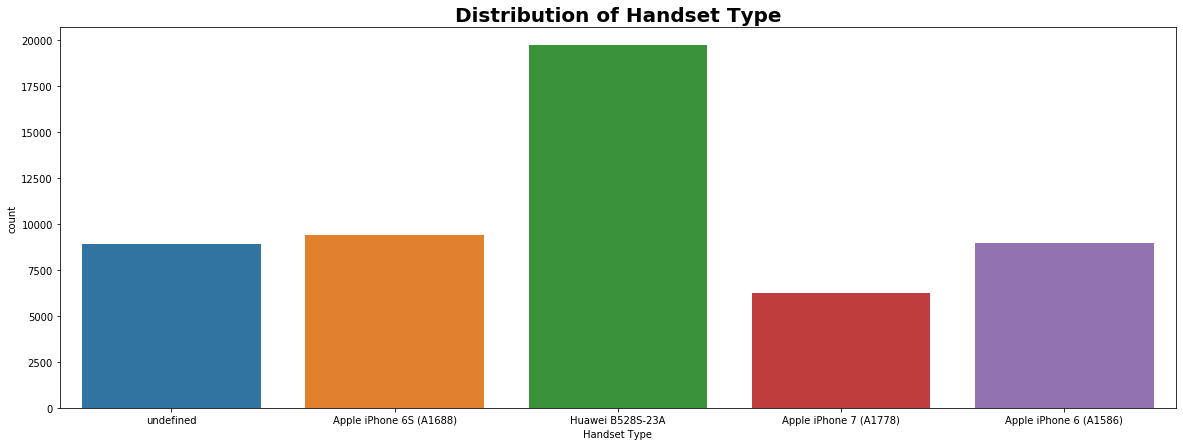

In [27]:
plot_count(handset_df, 'Handset Type')

In [10]:
df2 = df['Handset Manufacturer'].value_counts().head(3)
df2

Apple      59304
Samsung    40393
Huawei     34269
Name: Handset Manufacturer, dtype: int64

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt
def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(20, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

In [30]:
a = [df['Handset Manufacturer'].value_counts().head(3) if df['Handset Manufacturer']
a

Apple      59304
Samsung    40393
Huawei     34269
Name: Handset Manufacturer, dtype: int64

In [61]:
options = ['Apple', 'Samsung', 'Huawei']  
df2 =df[df['Handset Manufacturer'].isin(options)]


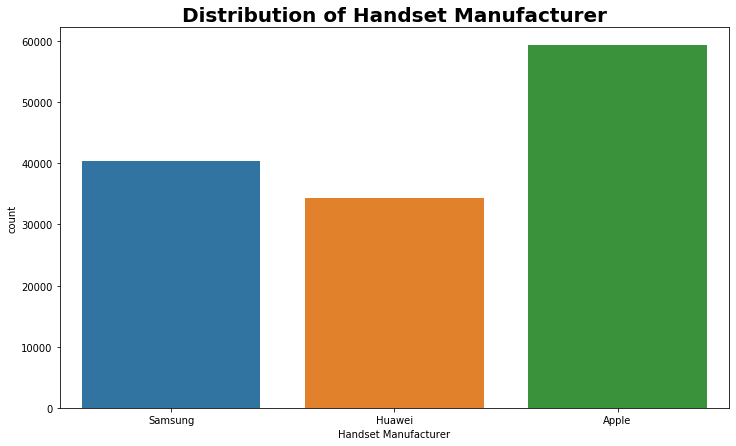

In [68]:
plot_count(df2, "Handset Manufacturer")

In [62]:
df2['Handset Type'].value_counts().head(5)

Huawei B528S-23A           19724
Apple iPhone 6S (A1688)     9391
Apple iPhone 6 (A1586)      8991
Apple iPhone 7 (A1778)      6274
Apple iPhone Se (A1723)     5165
Name: Handset Type, dtype: int64

- for our customers the dominating Handset manufactuers are Apple, Samsung, Huawei respectively
- but for handset type Huawei B528S-23A is by for the most used device amoung customers
- so targeting apple users more will benefit the most

In [6]:
df3 = df[['Unnamed: 0','Dur. (ms)','MSISDN/Number','Bearer Id','Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)',
       'Gaming UL (Bytes)','Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)',]]

In [7]:
df3.head()

,Unnamed: 0,Dur. (ms),MSISDN/Number,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1823652,3.366496e+10,1.310000e+19,1.545765,0.024420,1.634479,1.271433,3.563542,0.137762,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636
1,1,1365104,3.368185e+10,1.310000e+19,1.926113,0.007165,3.493924,0.920172,0.629046,0.308339,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965
2,2,1361762,3.376063e+10,1.310000e+19,1.684053,0.042224,8.535055,1.694064,2.690151,0.672973,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,3,1321509,3.375034e+10,1.310000e+19,0.644121,0.013372,9.023734,2.788027,1.439754,0.631229,21.388122,15.146643,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530
4,4,1089009,3.369980e+10,1.310000e+19,0.862600,0.050188,6.248284,1.500559,1.936496,0.173853,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589


In [8]:
def convert_megabytes_to_bytes(df, cols):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    for col in cols:      
        byte = 1*10e+5
        df[col] = df[col] * byte
    
    return df

In [81]:
cols = ['Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)',
       'Gaming UL (Bytes)','Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
df3 = convert_megabytes_to_bytes(df3, cols)

In [82]:
df3.head()

,Unnamed: 0,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1823652.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1,1365104.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2,1361762.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,3,1321509.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4,1089009.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [87]:
df3['Social Media DL (Bytes)'].describe()

count    1.483460e+05
mean     1.795138e+06
std      1.035473e+06
min      1.200000e+01
25%      8.989515e+05
50%      1.793802e+06
75%      2.694908e+06
max      3.586064e+06
Name: Social Media DL (Bytes), dtype: float64

In [85]:
df3['Social Media UL (Bytes)'].describe()

count    148346.000000
mean      32922.516772
std       19008.768333
min           0.000000
25%       16431.250000
50%       32916.000000
75%       49330.000000
max       65870.000000
Name: Social Media UL (Bytes), dtype: float64

In [88]:
df3['Total UL (Bytes)'].describe()

count    1.483460e+05
mean     4.112015e+07
std      1.127958e+07
min      2.866892e+06
25%      3.321763e+07
50%      4.114375e+07
75%      4.903338e+07
max      7.833131e+07
Name: Total UL (Bytes), dtype: float64

In [89]:
df3['Total DL (Bytes)'].describe()

count    1.483460e+05
mean     4.546996e+08
std      2.441771e+08
min      7.114041e+06
25%      2.431725e+08
50%      4.560177e+08
75%      6.657654e+08
max      9.029696e+08
Name: Total DL (Bytes), dtype: float64

In [12]:
df3.groupby('MSISDN/Number').sum().sample(10)

,Unnamed: 0,Dur. (ms),Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,
"33,699,502,362.00",37363,86399,"13,000,000,000,000,000,000.00",3.12,0.05,2.39,0.03,3.28,0.54,11.01,2.70,15.42,13.19,254.44,7.03,259.48,9.20,32.74,289.66
"33,658,515,669.00",154240,933412,"22,050,000,000,000,000,000.00",2.89,0.12,20.76,2.78,4.73,0.69,27.50,21.59,35.77,5.20,"1,433.28",25.98,"1,573.00",7.40,63.75,"1,524.94"
"33,641,556,100.00",144691,124970,"13,100,000,000,000,000,000.00",1.28,0.02,10.75,3.80,1.17,0.63,13.03,12.88,8.49,9.14,607.56,12.32,462.50,4.15,42.94,642.29
"33,613,312,811.00",60944,147327,"7,350,000,000,000,000,000.00",2.78,0.06,9.46,0.41,1.39,0.11,6.77,8.57,9.02,14.73,496.29,16.01,703.84,11.38,51.25,525.71
"33,663,667,378.00",272064,186356,"26,200,000,000,000,000,000.00",3.51,0.06,9.32,4.61,4.08,1.32,40.32,25.84,16.67,40.13,458.00,21.00,668.96,17.03,109.99,531.90
"33,621,940,409.00",7915,147041,"26,100,000,000,000,000,000.00",5.52,0.03,8.97,6.85,1.85,0.59,32.57,14.92,20.49,12.89,"1,002.23",22.60,"1,462.07",7.01,64.89,"1,071.64"
"33,672,042,569.00",48529,84742,"7,350,000,000,000,000,000.00",1.26,0.01,6.48,2.91,0.18,0.23,22.56,12.10,14.24,4.48,96.66,5.87,581.82,15.07,40.66,141.37
"33,650,347,211.00",92501,32896,"13,000,000,000,000,000,000.00",2.71,0.05,5.25,3.36,2.52,0.60,10.51,8.19,16.97,4.25,119.87,3.70,42.59,7.59,27.74,157.83
"33,618,778,641.00",17486,15311,"7,350,000,000,000,000,000.00",3.53,0.02,7.58,1.22,2.44,0.27,7.55,2.42,21.62,14.05,626.90,8.66,104.31,9.03,35.68,669.62


In [44]:
def format_float(value):
    return f'{value:,.2f}'

pd.options.display.float_format = format_float

In [46]:
pd.reset_option('display.float_format')

In [42]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str,hue= None, style= None) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

In [17]:
df4 = pd.DataFrame()

In [35]:
df4['sessions'] = df3['Bearer Id']
df4['MSISDN/Number'] = df3['MSISDN/Number']
df4['Duration'] = df3['Dur. (ms)']
sum_column1 = df3['Social Media UL (Bytes)'] + df3['Social Media DL (Bytes)']
sum_column2 = df3['Google UL (Bytes)'] + df3['Google DL (Bytes)']
sum_column3 = df3['Email DL (Bytes)'] + df3['Email UL (Bytes)']
sum_column4 = df3['Youtube DL (Bytes)'] + df3['Youtube UL (Bytes)']
sum_column5 = df3['Netflix DL (Bytes)'] + df3['Netflix UL (Bytes)']
sum_column6 = df3['Gaming UL (Bytes)'] + df3['Gaming DL (Bytes)']
sum_column7 = df3['Other DL (Bytes)'] + df3['Other UL (Bytes)']
sum_column8 = df3['Total UL (Bytes)'] + df3['Total DL (Bytes)']
df4["Social Media DL+UL"] = sum_column1
df4["Google UL DL+UL"] = sum_column2
df4["Email DL+UL"] = sum_column3
df4["Youtube DL+UL"] = sum_column4
df4["Netflix DL+UL"] = sum_column5
df4["Gaming DL+UL"] = sum_column6
df4["Other DL+UL"] = sum_column7
df4["Total DL+UL"] = sum_column8

# Non Graphical Univariate analysis

In [95]:
df3.var()

Unnamed: 0                         1,872,413,658.45
Dur. (ms)                          6,563,974,619.27
Social Media DL (Bytes)        1,072,203,643,881.64
Social Media UL (Bytes)              361,333,273.54
Google DL (Bytes)             10,948,753,103,604.02
Google UL (Bytes)              1,416,072,573,957.48
Email DL (Bytes)               1,073,351,426,644.34
Email UL (Bytes)                  72,897,891,537.95
Youtube DL (Bytes)            45,040,497,543,655.70
Youtube UL (Bytes)            40,266,049,470,400.78
Netflix DL (Bytes)            45,228,789,032,769.02
Netflix UL (Bytes)            40,426,516,191,350.02
Gaming DL (Bytes)         59,537,241,666,255,840.00
Gaming UL (Bytes)             22,863,665,799,699.32
Other DL (Bytes)          59,130,759,537,068,472.00
Other UL (Bytes)              22,746,715,853,055.16
Total UL (Bytes)             127,228,813,388,886.45
Total DL (Bytes)          59,622,449,310,685,192.00
dtype: float64

In [96]:
df3.std()

Unnamed: 0                     43,271.40
Dur. (ms)                      81,018.36
Social Media DL (Bytes)     1,035,472.67
Social Media UL (Bytes)        19,008.77
Google DL (Bytes)           3,308,890.01
Google UL (Bytes)           1,189,988.48
Email DL (Bytes)            1,036,026.75
Email UL (Bytes)              269,996.10
Youtube DL (Bytes)          6,711,221.76
Youtube UL (Bytes)          6,345,553.52
Netflix DL (Bytes)          6,725,235.24
Netflix UL (Bytes)          6,358,184.98
Gaming DL (Bytes)         244,002,544.38
Gaming UL (Bytes)           4,781,596.57
Other DL (Bytes)          243,168,171.31
Other UL (Bytes)            4,769,351.72
Total UL (Bytes)           11,279,575.05
Total DL (Bytes)          244,177,085.97
dtype: float64

In [97]:
df3.mean()

Unnamed: 0                     75,180.74
Dur. (ms)                     105,129.39
Social Media DL (Bytes)     1,795,138.21
Social Media UL (Bytes)        32,922.52
Google DL (Bytes)           5,751,626.31
Google UL (Bytes)           2,056,246.34
Email DL (Bytes)            1,791,723.33
Email UL (Bytes)              467,382.68
Youtube DL (Bytes)         11,634,452.53
Youtube UL (Bytes)         11,008,573.77
Netflix DL (Bytes)         11,627,476.86
Netflix UL (Bytes)         11,001,869.16
Gaming DL (Bytes)         422,099,179.28
Gaming UL (Bytes)           8,290,269.21
Other DL (Bytes)          421,165,604.23
Other UL (Bytes)            8,262,889.63
Total UL (Bytes)           41,120,153.31
Total DL (Bytes)          454,699,596.52
dtype: float64

In [98]:
df3.median()

Unnamed: 0                     75,086.50
Dur. (ms)                      86,399.00
Social Media DL (Bytes)     1,793,802.00
Social Media UL (Bytes)        32,916.00
Google DL (Bytes)           5,767,286.00
Google UL (Bytes)           2,054,278.00
Email DL (Bytes)            1,793,585.50
Email UL (Bytes)              466,419.00
Youtube DL (Bytes)         11,617,271.00
Youtube UL (Bytes)         11,011,967.50
Netflix DL (Bytes)         11,642,856.50
Netflix UL (Bytes)         10,999,070.50
Gaming DL (Bytes)         423,536,861.50
Gaming UL (Bytes)           8,293,466.00
Other DL (Bytes)          421,871,122.50
Other UL (Bytes)            8,265,908.00
Total UL (Bytes)           41,143,748.50
Total DL (Bytes)          456,017,654.00
dtype: float64

In [101]:
df3.max()

Unnamed: 0                    149,999.00
Dur. (ms)                   1,859,336.00
Social Media DL (Bytes)     3,586,064.00
Social Media UL (Bytes)        65,870.00
Google DL (Bytes)          11,462,832.00
Google UL (Bytes)           4,121,357.00
Email DL (Bytes)            3,586,146.00
Email UL (Bytes)              936,418.00
Youtube DL (Bytes)         23,259,098.00
Youtube UL (Bytes)         22,011,962.00
Netflix DL (Bytes)         23,259,189.00
Netflix UL (Bytes)         22,011,955.00
Gaming DL (Bytes)         843,441,889.00
Gaming UL (Bytes)          16,558,794.00
Other DL (Bytes)          843,442,489.00
Other UL (Bytes)           16,558,816.00
Total UL (Bytes)           78,331,311.00
Total DL (Bytes)          902,969,616.00
dtype: float64

In [102]:
df3.min()

Unnamed: 0                        0.00
Dur. (ms)                     7,142.00
Social Media DL (Bytes)          12.00
Social Media UL (Bytes)           0.00
Google DL (Bytes)               207.00
Google UL (Bytes)                 3.00
Email DL (Bytes)                 14.00
Email UL (Bytes)                  2.00
Youtube DL (Bytes)               53.00
Youtube UL (Bytes)              105.00
Netflix DL (Bytes)               42.00
Netflix UL (Bytes)               35.00
Gaming DL (Bytes)             2,516.00
Gaming UL (Bytes)                59.00
Other DL (Bytes)              3,290.00
Other UL (Bytes)                148.00
Total UL (Bytes)          2,866,892.00
Total DL (Bytes)          7,114,041.00
dtype: float64

In [73]:
df3.describe()

,Unnamed: 0,Dur. (ms),MSISDN/Number,Bearer Id,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,148346.000000,1.483460e+05,1.483460e+05,1.483460e+05,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000
mean,75180.741584,1.051294e+05,4.191542e+10,1.013322e+19,1.795138,0.032923,5.751626,2.056246,1.791723,0.467383,11.634453,11.008574,11.627477,11.001869,422.099179,8.290269,421.165604,8.262890,41.120153,454.699597
std,43271.395384,8.101836e+04,2.452297e+12,2.878662e+18,1.035473,0.019009,3.308890,1.189988,1.036027,0.269996,6.711222,6.345554,6.725235,6.358185,244.002544,4.781597,243.168171,4.769352,11.279575,244.177086
min,0.000000,7.142000e+03,3.360100e+10,6.920000e+18,0.000012,0.000000,0.000207,0.000003,0.000014,0.000002,0.000053,0.000105,0.000042,0.000035,0.002516,0.000059,0.003290,0.000148,2.866892,7.114041
25%,37862.250000,5.837400e+04,3.365131e+10,7.350000e+18,0.898952,0.016431,2.883119,1.023912,0.892502,0.233414,5.833525,5.515832,5.778898,5.476158,210.549627,4.132224,210.275925,4.143476,33.217632,243.172528
50%,75086.500000,8.639900e+04,3.366371e+10,7.350000e+18,1.793802,0.032916,5.767286,2.054278,1.793585,0.466419,11.617271,11.011968,11.642857,10.999070,423.536861,8.293466,421.871123,8.265908,41.143749,456.017654
75%,112710.750000,1.329658e+05,3.368352e+10,1.300000e+19,2.694908,0.049330,8.624089,3.088155,2.689935,0.700482,17.446392,16.514630,17.471210,16.504495,633.297788,12.432138,631.651723,12.382362,49.033382,665.765393
max,149999.000000,1.859336e+06,8.823970e+14,1.320000e+19,3.586064,0.065870,11.462832,4.121357,3.586146,0.936418,23.259098,22.011962,23.259189,22.011955,843.441889,16.558794,843.442489,16.558816,78.331311,902.969616


In [79]:
df7 = df4[['Social Media DL+UL','Google UL DL+UL', 'Email DL+UL', 'Youtube DL+UL',
    'Netflix DL+UL', 'Gaming DL+UL', 'Other DL+UL', 'Total DL+UL']].copy()
df7.describe()

,Social Media DL+UL,Google UL DL+UL,Email DL+UL,Youtube DL+UL,Netflix DL+UL,Gaming DL+UL,Other DL+UL,Total DL+UL
count,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000,148346.000000
mean,1.828061,7.807873,2.259106,22.643026,22.629346,430.389448,429.428494,495.819750
std,1.035639,3.516809,1.071225,9.246986,9.261040,244.054466,243.232432,244.411982
min,0.001563,0.040330,0.008359,0.078903,0.098432,0.306358,0.149045,28.956107
25%,0.932107,4.944519,1.359097,15.994004,15.979605,218.772702,218.622527,284.585673
50%,1.825882,7.815536,2.263982,22.662868,22.636381,431.691449,430.070941,496.990055
75%,2.727520,10.683037,3.160082,29.298240,29.288322,641.543961,639.903763,706.614719
max,3.650861,15.528782,4.518036,45.190078,45.198153,859.202784,859.520934,955.984776


# Graphical Univariate

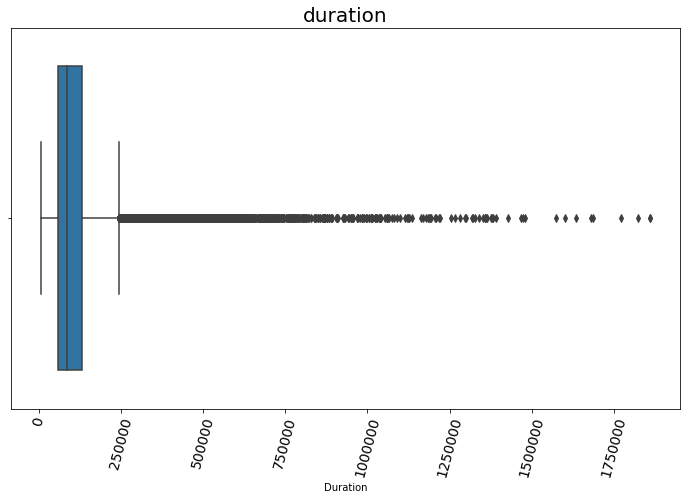

In [36]:
plot_box(df4, "Duration", "duration")

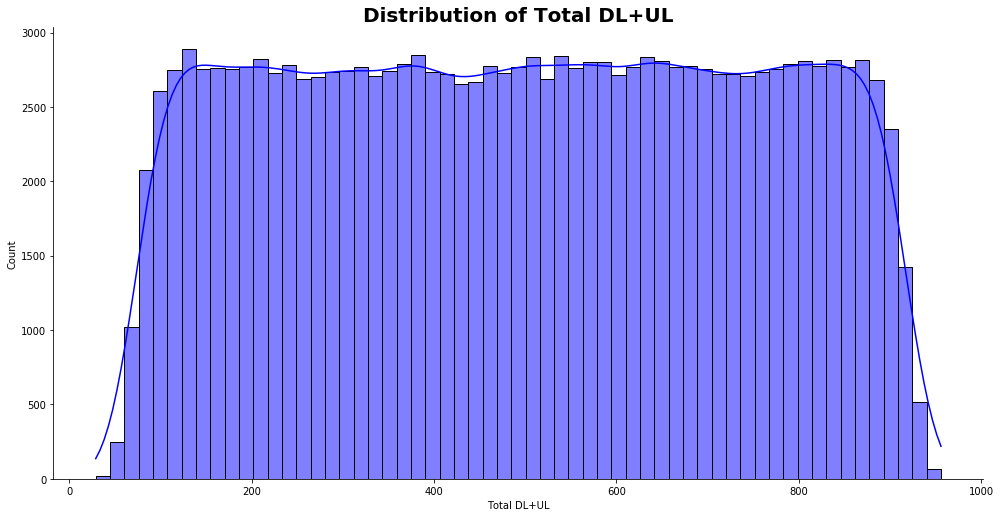

In [27]:
plot_hist(df4, 'Total DL+UL', color='blue')

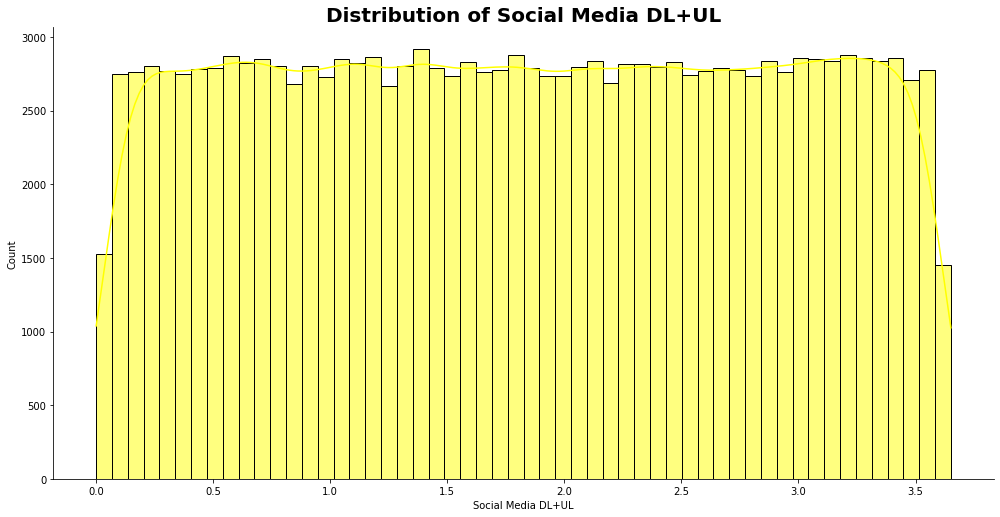

In [25]:
plot_hist(df4, 'Social Media DL+UL', color='yellow')

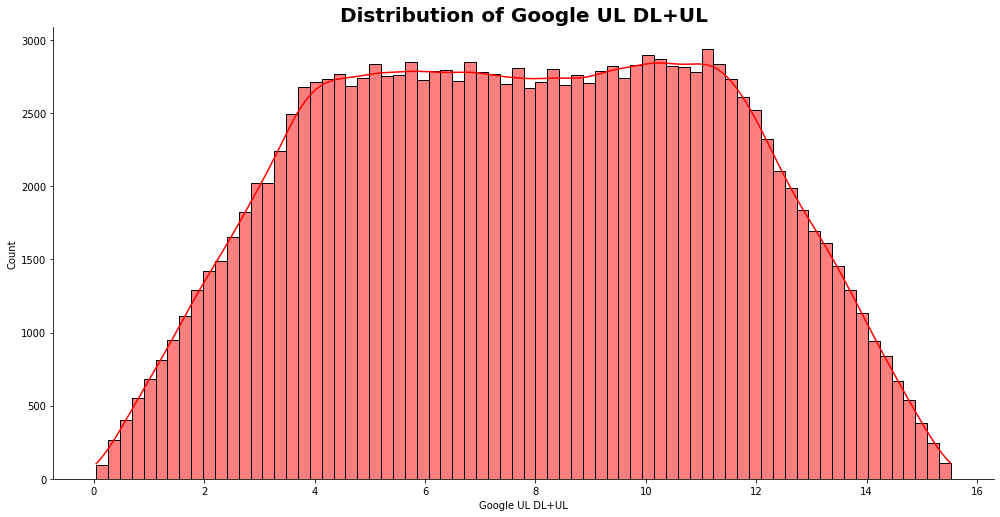

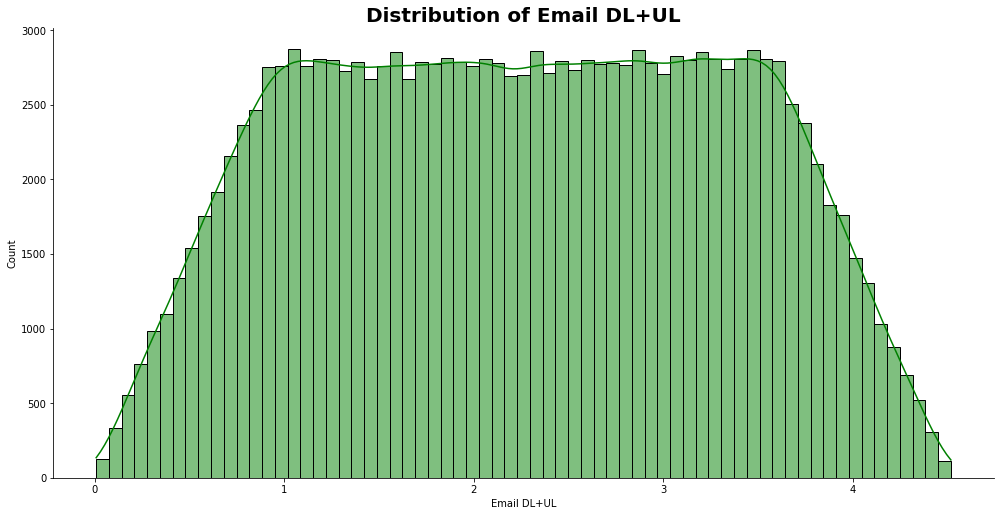

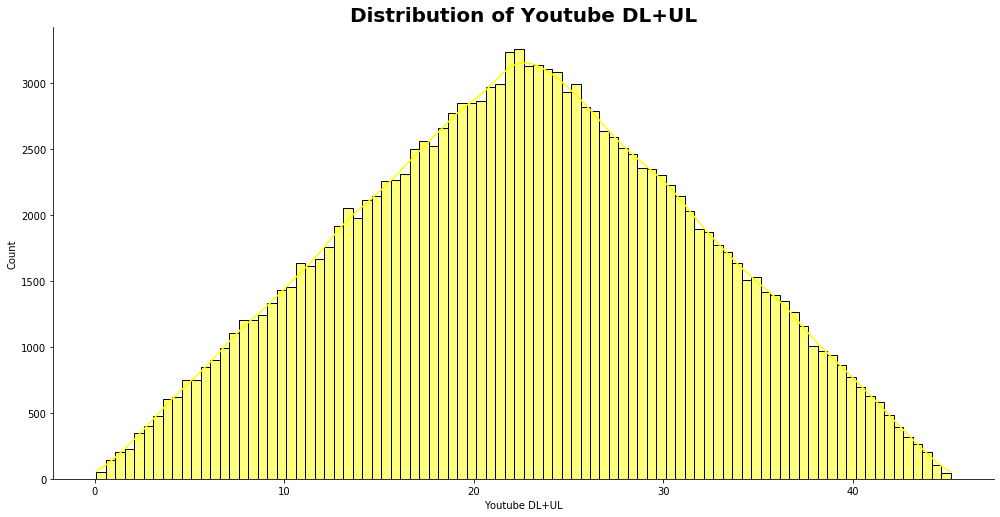

In [26]:
plot_hist(df4, 'Google UL DL+UL', color='red')
plot_hist(df4, 'Email DL+UL', color='green')
plot_hist(df4, 'Youtube DL+UL', color='yellow')

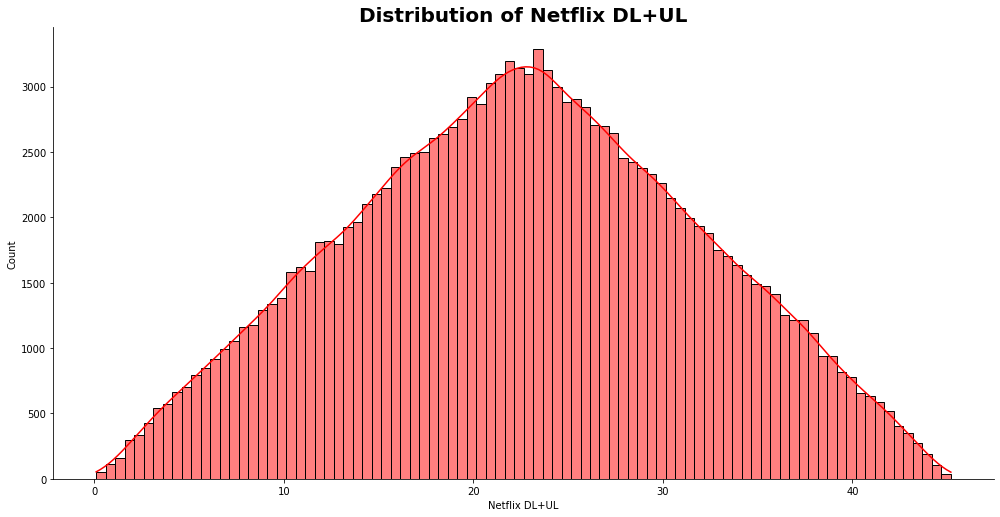

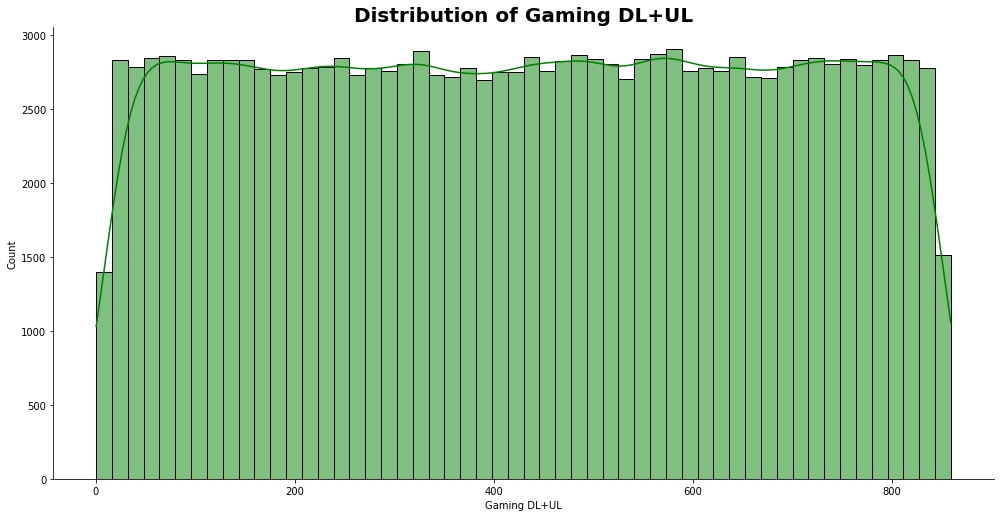

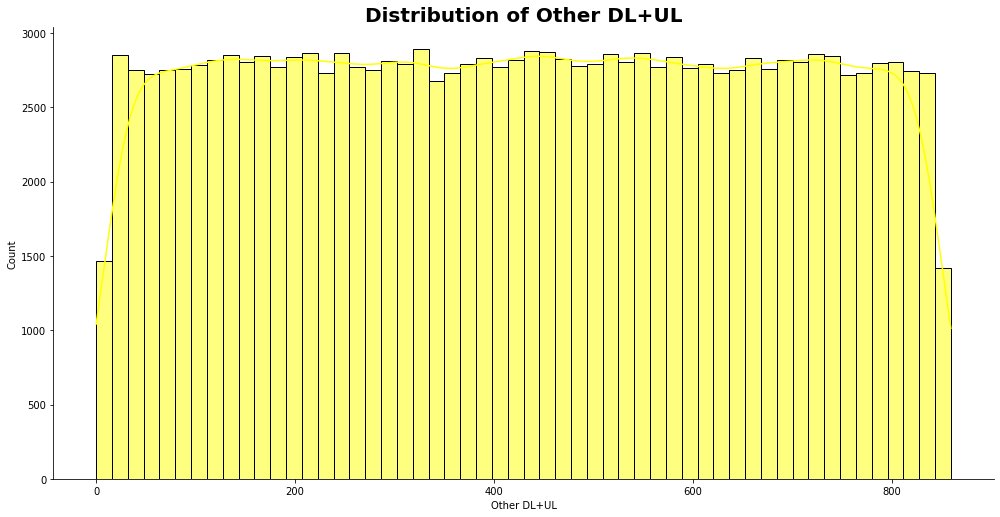

In [28]:
plot_hist(df4, 'Netflix DL+UL', color='red')
plot_hist(df4, 'Gaming DL+UL', color='green')
plot_hist(df4, 'Other DL+UL', color='yellow')

In [20]:
df4.head()

,sessions,Dur. (ms),Social Media DL+UL,Google UL DL+UL,Email DL+UL,Youtube DL+UL,Netflix DL+UL,Gaming DL+UL,Other DL+UL,Total DL+UL
0,0,1823652,1.57,2.91,3.70,18.36,17.86,292.43,180.56,345.63
1,1,1365104,1.93,4.41,0.94,39.36,35.57,609.92,541.96,707.19
2,2,1361762,1.73,10.23,3.36,34.43,23.75,229.98,414.91,307.69
3,3,1321509,0.66,11.81,2.07,36.53,15.09,810.39,761.84,889.35
4,4,1089009,0.91,7.75,2.11,34.22,17.54,531.24,564.62,607.68


In [ ]:
plot_box(df3, "Social Media UL (Bytes)", "Social Media UL (Bytes) outliers")

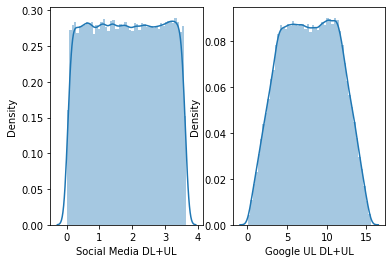

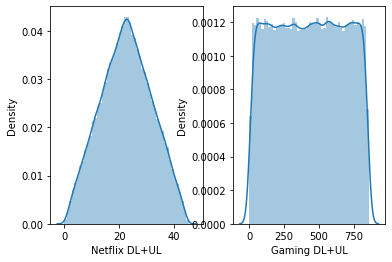

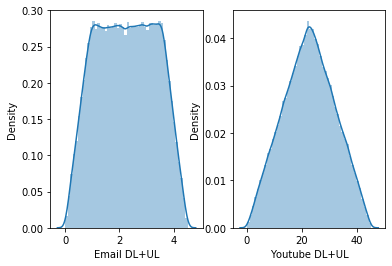

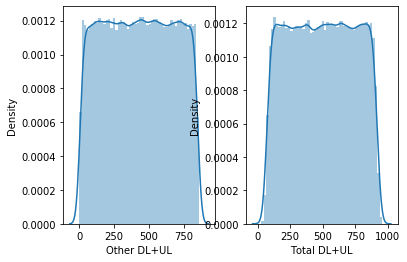

In [81]:
import math
def plot_multiple_histograms(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.distplot(df[col], kde=True, ax=axs)
            else:
                sns.distplot(df[col], kde=True, ax=axs[j])
        else:
            sns.distplot(df[col], kde=True, ax=axs[i, j])

            
plot_multiple_histograms(df4, ['Social Media DL+UL','Google UL DL+UL'])
plot_multiple_histograms(df4, ['Netflix DL+UL', 'Gaming DL+UL'])
plot_multiple_histograms(df4, ['Email DL+UL', 'Youtube DL+UL'])
plot_multiple_histograms(df4, ['Other DL+UL', 'Total DL+UL'])

# Bivariate Analysis

In [208]:
df4 = pd.DataFrame()

In [209]:
df4['sessions'] = df3['Bearer Id']
df4['MSISDN/Number'] = df3['MSISDN/Number']
df4['Duration'] = df3['Dur. (ms)']
sum_column1 = df3['Social Media UL (Bytes)'] + df3['Social Media DL (Bytes)']
sum_column2 = df3['Google UL (Bytes)'] + df3['Google DL (Bytes)']
sum_column3 = df3['Email DL (Bytes)'] + df3['Email UL (Bytes)']
sum_column4 = df3['Youtube DL (Bytes)'] + df3['Youtube UL (Bytes)']
sum_column5 = df3['Netflix DL (Bytes)'] + df3['Netflix UL (Bytes)']
sum_column6 = df3['Gaming UL (Bytes)'] + df3['Gaming DL (Bytes)']
sum_column7 = df3['Other DL (Bytes)'] + df3['Other UL (Bytes)']
sum_column8 = df3['Total UL (Bytes)'] + df3['Total DL (Bytes)']
df4["Social Media DL+UL"] = sum_column1
df4["Google UL DL+UL"] = sum_column2
df4["Email DL+UL"] = sum_column3
df4["Youtube DL+UL"] = sum_column4
df4["Netflix DL+UL"] = sum_column5
df4["Gaming DL+UL"] = sum_column6
df4["Other DL+UL"] = sum_column7
df4["Total DL+UL"] = sum_column8


In [34]:
df4

,sessions,Dur. (ms),Social Media DL+UL,Google UL DL+UL,Email DL+UL,Youtube DL+UL,Netflix DL+UL,Gaming DL+UL,Other DL+UL,Total DL+UL
0,0,1823652,1.57,2.91,3.70,18.36,17.86,292.43,180.56,345.63
1,1,1365104,1.93,4.41,0.94,39.36,35.57,609.92,541.96,707.19
2,2,1361762,1.73,10.23,3.36,34.43,23.75,229.98,414.91,307.69
3,3,1321509,0.66,11.81,2.07,36.53,15.09,810.39,761.84,889.35
4,4,1089009,0.91,7.75,2.11,34.22,17.54,531.24,564.62,607.68
...,...,...,...,...,...,...,...,...,...,...
148341,149995,59587,0.99,1.27,4.28,24.55,29.62,797.16,336.27,872.76
148342,149996,81230,3.52,12.78,0.69,27.96,37.56,535.81,16.75,631.80
148343,149997,97970,2.35,4.42,2.12,22.17,40.64,631.63,714.64,705.78
148344,149998,98249,1.26,6.59,2.06,24.52,15.03,566.93,132.42,627.70


In [274]:
def convert_bytes_to_megabytes(df, cols):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    for col in cols:      
        megabyte = 1*10e+5
        df[col] = df[col] / megabyte
    
    return df

In [277]:
cols = ['Social Media DL+UL','Google UL DL+UL','Email DL+UL',
       'Youtube DL+UL','Netflix DL+UL','Gaming DL+UL',
       'Gaming DL+UL','Other DL+UL', 'Total DL+UL']
df4 = convert_bytes_to_megabytes(df4, cols)

In [47]:
df5 = pd.DataFrame()
df5 = df4.groupby('MSISDN/Number').sum()
df5

,sessions,Dur. (ms),Social Media DL+UL,Google UL DL+UL,Email DL+UL,Youtube DL+UL,Netflix DL+UL,Gaming DL+UL,Other DL+UL,Total DL+UL,Duration
MSISDN/Number,,,,,,,,,,,
3.360100e+10,1.310000e+19,116720,2.232135,4.389005,1.331362,21.624548,27.180981,812.458661,386.570872,878.690574,116720
3.360100e+10,7.350000e+18,181230,2.660565,5.334863,3.307781,12.432223,11.221763,119.750078,281.710071,156.859643,181230
3.360100e+10,7.350000e+18,134969,3.195623,3.443126,3.205380,21.333570,19.353900,538.827713,501.693672,595.966483,134969
3.360101e+10,1.300000e+19,49878,0.280294,9.678493,2.284670,6.977321,1.942092,391.126127,35.279702,422.320698,49878
3.360101e+10,1.463000e+19,37104,2.912542,18.499616,3.305469,41.533002,49.201724,1314.797820,804.804484,1457.410944,37104
...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,1.300000e+19,8810,0.300183,7.531269,1.006915,26.647843,14.902538,660.361359,295.282817,714.641641,8810
3.379000e+10,1.310000e+19,140988,0.498569,5.429705,2.514097,19.851572,8.531060,437.003292,211.115113,480.307335,140988
3.197020e+12,7.280000e+18,877385,0.715224,10.438660,1.520771,11.959905,26.592300,178.048738,470.526473,232.123971,877385


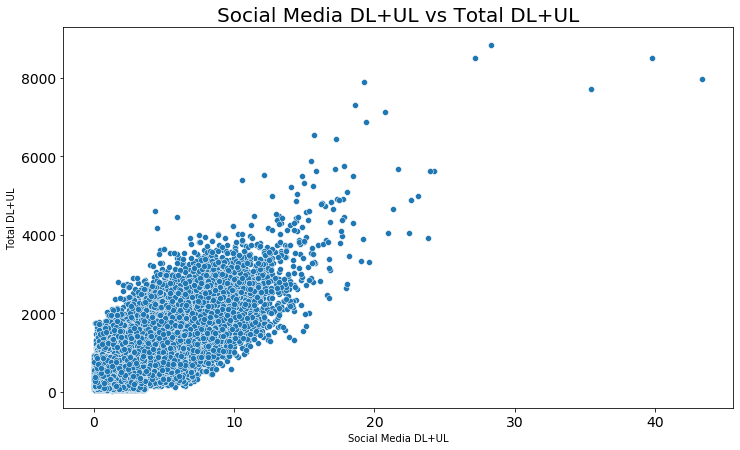

In [52]:
plot_scatter(df5, x_col="Social Media DL+UL", y_col="Total DL+UL", title="Social Media DL+UL vs Total DL+UL")

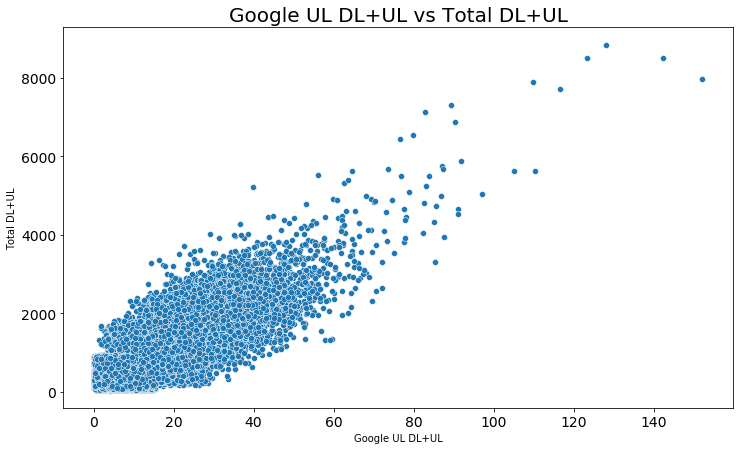

In [53]:
plot_scatter(df5, x_col="Google UL DL+UL", y_col="Total DL+UL", title="Google UL DL+UL vs Total DL+UL")

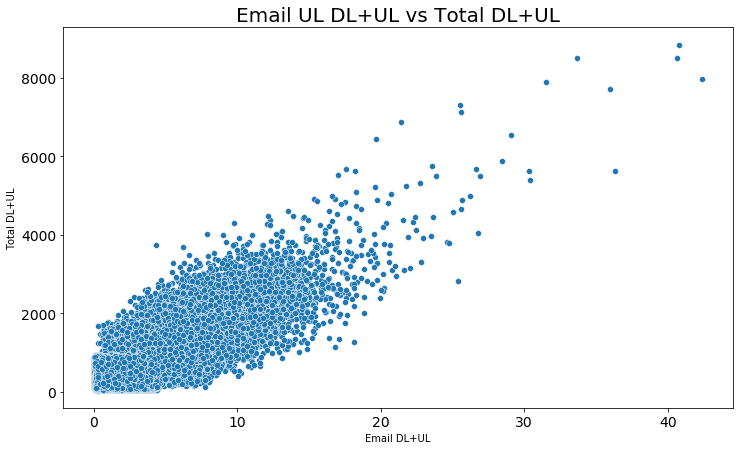

In [54]:
plot_scatter(df5, x_col="Email DL+UL", y_col="Total DL+UL", title="Email UL DL+UL vs Total DL+UL")

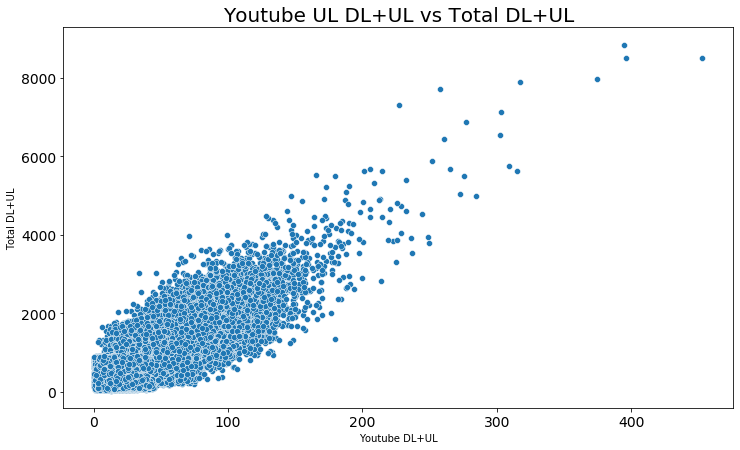

In [55]:
plot_scatter(df5, x_col="Youtube DL+UL", y_col="Total DL+UL", title="Youtube UL DL+UL vs Total DL+UL")

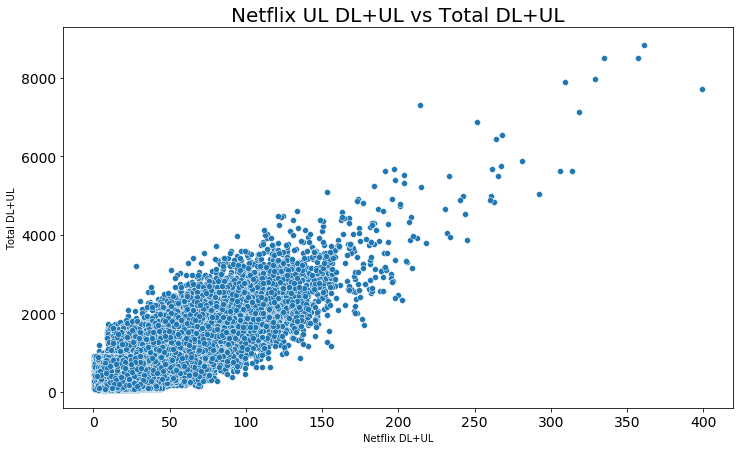

In [56]:
plot_scatter(df5, x_col="Netflix DL+UL", y_col="Total DL+UL", title="Netflix UL DL+UL vs Total DL+UL")

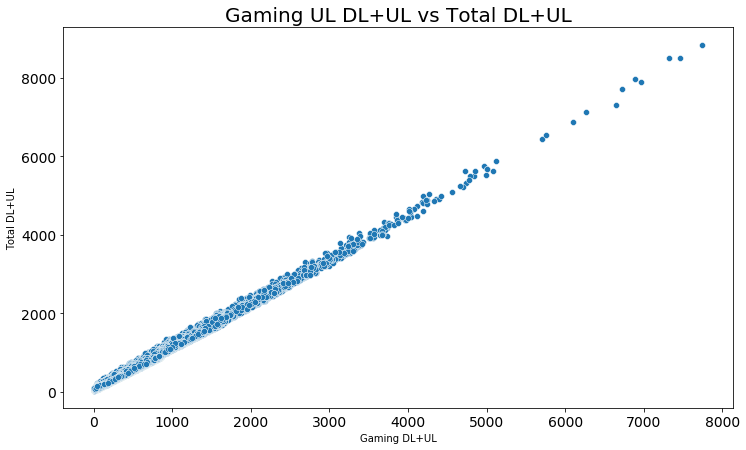

In [58]:
plot_scatter(df5, x_col="Gaming DL+UL", y_col="Total DL+UL", title="Gaming UL DL+UL vs Total DL+UL")

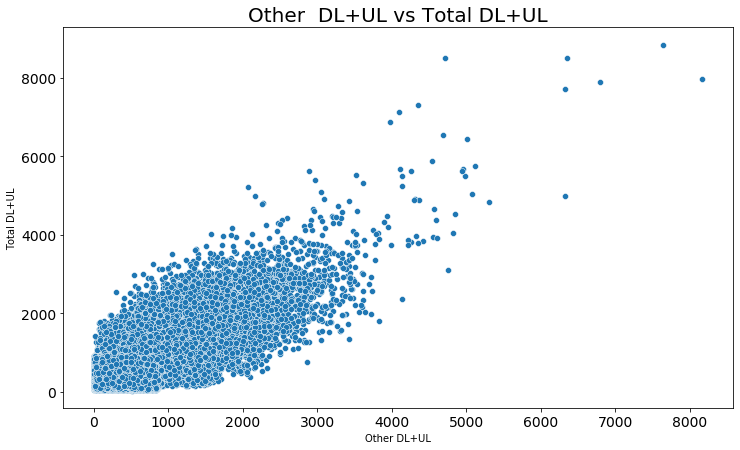

In [60]:
plot_scatter(df5, x_col="Other DL+UL", y_col="Total DL+UL", title="Other  DL+UL vs Total DL+UL")

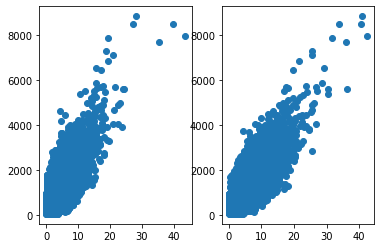

In [97]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#ax5 = fig.add_subplot(321)
#ax6 = fig.add_subplot(322)
ax1.scatter(df5['Social Media DL+UL'],df5['Total DL+UL'])
ax2.scatter(df5['Email DL+UL'],df5['Total DL+UL'])
#ax5.scatter(df5['Gaming DL+UL'],df5['Total DL+UL'])
#ax6.scatter(df5['Other DL+UL'],df5['Total DL+UL'])

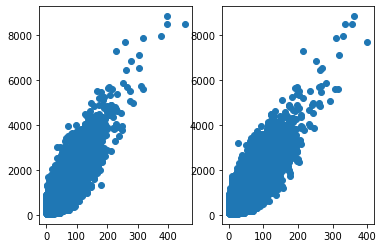

In [99]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(df5['Youtube DL+UL'],df5['Total DL+UL'])
ax2.scatter(df5['Netflix DL+UL'],df5['Total DL+UL'])

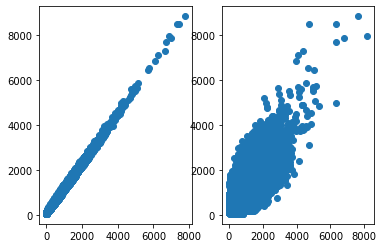

In [100]:
fig = plt.figure()
ax5 = fig.add_subplot(121)
ax6 = fig.add_subplot(122)
ax5.scatter(df5['Gaming DL+UL'],df5['Total DL+UL'])
ax6.scatter(df5['Other DL+UL'],df5['Total DL+UL'])

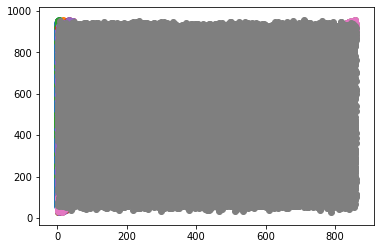

In [85]:
cols = ['Social Media DL+UL','Google UL DL+UL','Email DL+UL',
       'Youtube DL+UL','Netflix DL+UL','Gaming DL+UL','Other DL+UL', ]
for i in range(len(cols)):
    plt.scatter(df5[cols[i]], df5['Total DL+UL'])

In [82]:
cols = ['Social Media DL+UL','Google UL DL+UL','Email DL+UL',
       'Youtube DL+UL','Netflix DL+UL','Gaming DL+UL',
       'Gaming DL+UL','Other DL+UL', 'Total DL+UL']
for pos, axis1 in enumerate(cols):
    for axis2 in enumerate(cols[pos]):
        plt.scatter(df4.loc[:, axis1], df4.loc[:, axis2])

SyntaxError: unexpected EOF while parsing (<ipython-input-82-26a61ce48b60>, line 5)

# Variable transformations

In [61]:
deciles = pd.qcut(df4['Duration'], 5, labels=["1st_decile", "2nd_decile","3rd_decile", "4th_decile","5th_decile"])

In [62]:
df4['decile'] = deciles

In [63]:
df4.groupby('decile').agg({'Total DL+UL': 'sum'})
df4

,sessions,Dur. (ms),Social Media DL+UL,Google UL DL+UL,Email DL+UL,Youtube DL+UL,Netflix DL+UL,Gaming DL+UL,Other DL+UL,Total DL+UL,MSISDN/Number,Duration,decile
0,1.310000e+19,1823652,1.570185,2.905912,3.701304,18.355943,17.855187,292.426453,180.558843,345.629377,3.366496e+10,1823652,5th_decile
1,1.310000e+19,1365104,1.933278,4.414096,0.937385,39.359124,35.565545,609.920783,541.959383,707.185356,3.368185e+10,1365104,5th_decile
2,1.310000e+19,1361762,1.726277,10.229119,3.363124,34.425237,23.751202,229.980251,414.908351,307.690973,3.376063e+10,1361762,5th_decile
3,1.310000e+19,1321509,0.657493,11.811761,2.070983,36.534765,15.092588,810.387875,761.837216,889.352748,3.375034e+10,1321509,5th_decile
4,1.310000e+19,1089009,0.912788,7.748843,2.110349,34.222253,17.539799,531.237049,564.619822,607.681403,3.369980e+10,1089009,5th_decile
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148341,1.300000e+19,59587,0.993175,1.265634,4.280107,24.553645,29.618711,797.160102,336.273648,872.761860,3.366865e+10,59587,2nd_decile
148342,7.280000e+18,81230,3.517065,12.784914,0.690876,27.955095,37.561864,535.806880,16.751926,631.804110,3.365069e+10,81230,2nd_decile
148343,7.350000e+18,97970,2.352181,4.415361,2.121718,22.165518,40.643294,631.628095,714.638145,705.783925,3.366345e+10,97970,4th_decile
148344,1.310000e+19,98249,1.260239,6.585469,2.058277,24.516413,15.029702,566.933800,132.415585,627.698629,3.362189e+10,98249,4th_decile


In [228]:
np.percentile(df4['Total DL+UL'], np.arange(0, 100, 20))

array([2.89561070e+07, 2.41638280e+08, 4.11293045e+08, 5.80651545e+08,
       7.49488315e+08])

# Correlation Analysis

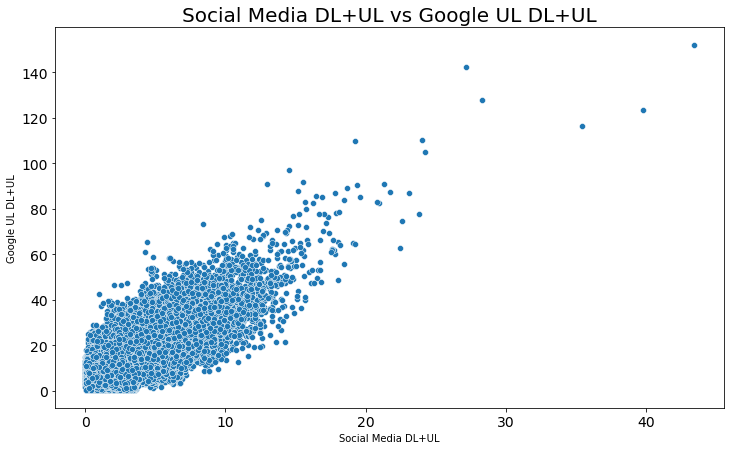

In [64]:
plot_scatter(df5, x_col="Social Media DL+UL", y_col="Google UL DL+UL", title="Social Media DL+UL vs Google UL DL+UL")

In [66]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df5['Social Media DL+UL'], df5['Google UL DL+UL'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.643


In [67]:
from scipy.stats import spearmanr

corr, _ = spearmanr(df5['Social Media DL+UL'], df5['Google UL DL+UL'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.400


In [68]:
corr, _ = pearsonr(df5['Netflix DL+UL'], df5['Youtube DL+UL'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.739


In [69]:
corr, _ = pearsonr(df5['Gaming DL+UL'], df5['Other DL+UL'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.587


In [70]:
corr, _ = pearsonr(df5['Google UL DL+UL'], df5['Email DL+UL'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.689


In [71]:
corr, _ = pearsonr(df5['Social Media DL+UL'], df5['Youtube DL+UL'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.660


In [72]:
corr, _ = spearmanr(df5['Other DL+UL'], df5['Google UL DL+UL'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.397


- doing the correlation between two applications can either be postive, negative or neutral
- the range is between -1 to +1
- the closer to +1 the postive is thier relation(when one goes up the other goes up as well
- the closer to -1 the negative it is thier relation(when one goes up the other goes DOWN as well
- the data google with email, social media with youtube and especially netflix with youtube look corrleated to each other

# Dimensionality Reduction

In [257]:
from sklearn.preprocessing import MinMaxScaler

def scaler(df):
    minmax_scaler = MinMaxScaler(copy=True, feature_range=(-1, 1))
    return pd.DataFrame(minmax_scaler.fit_transform(df))

df6 = scaler(df4)

In [258]:
d6

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.00,0.96,-0.14,-0.26,-0.71,-0.38,0.99,-0.71,0.36,-0.77,-0.29,-0.12,-0.34,0.73,-0.59,0.06,-0.10,-0.33,-0.32
1,-1.00,0.47,0.07,-0.78,-0.39,-0.55,-0.65,-0.34,0.74,0.74,0.58,0.57,0.44,-0.86,0.25,0.82,0.35,0.44,0.46
2,-1.00,0.46,-0.06,0.28,0.49,-0.18,0.50,0.44,0.70,0.34,0.51,-0.44,-0.46,-0.95,-0.03,-0.49,-0.34,-0.39,-0.40
3,-1.00,0.42,-0.64,-0.59,0.57,0.35,-0.20,0.35,0.84,0.38,0.20,-0.90,0.90,0.31,0.78,0.55,0.07,0.87,0.86
4,-1.00,0.17,-0.52,0.52,0.09,-0.27,0.08,-0.63,0.31,0.72,0.47,-0.96,0.25,-0.57,0.31,0.68,-0.05,0.25,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148341,1.00,-0.94,-0.46,-0.06,-0.80,-0.94,0.93,0.75,-0.44,0.64,0.93,-0.35,0.86,0.54,-0.24,0.80,0.35,0.81,0.82
148342,1.00,-0.92,0.93,0.58,0.74,0.37,-0.97,0.35,0.39,0.07,0.54,0.79,0.25,0.11,-0.99,0.63,0.45,0.27,0.30
148343,1.00,-0.90,0.31,-0.77,-0.61,0.06,0.09,-0.64,0.19,-0.25,0.66,0.93,0.49,-0.43,0.69,-0.70,-0.04,0.47,0.46
148344,1.00,-0.90,-0.31,-0.56,-0.33,0.33,-0.15,0.14,0.95,-0.83,-0.14,-0.54,0.31,0.62,-0.71,0.37,-0.15,0.31,0.29


In [266]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df5)
df6 = pd.DataFrame(pca.transform(df5))


In [267]:
df6.head()

,0,1
0,0.57,0.25
1,-0.79,-0.88
2,0.72,0.66
3,-1.53,-0.14
4,-0.44,0.17


- PCA is very famous Dimensionality Reduction Technique
- it can benefit for faster training the model as well as clearer visulaziation
- before the pca is done it should be scaled
- finally i have projected into a space with 2 columns